# Below we will import various libraries that are needed for data preprocessing.

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Dataset : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# Let us see how the librosa library loads the audio file and see the sample rate.

In [2]:
y, sr = librosa.load('wavfiles/blues.00005.wav')

In [3]:
y.shape

(661794,)

# Sampling rate

In [4]:
sr

22050

## Ref: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

# Plotting the wave(signal) using matplot

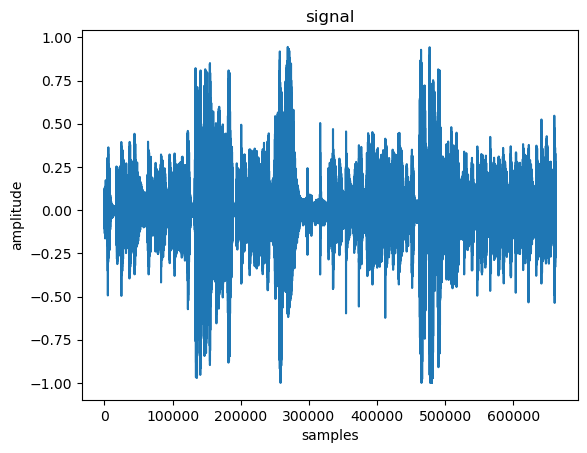

In [5]:
# Plotting the wave
plt.plot(y);
plt.title('signal');
plt.xlabel('samples');
plt.ylabel('amplitude');

# Fourier Transform

In [6]:
fourier_transform = np.abs(librosa.stft(y[:2048], hop_length = 2048+1))

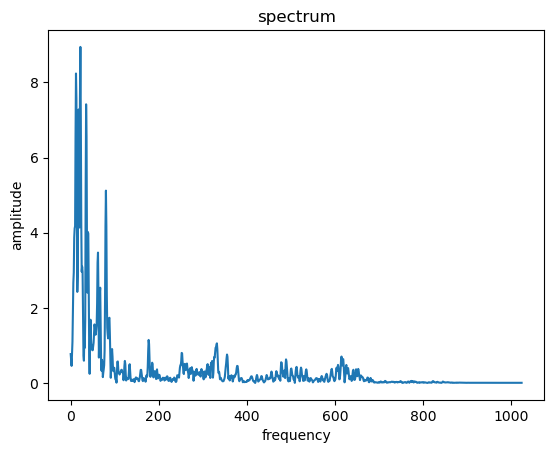

In [7]:
plt.plot(fourier_transform);
plt.title('spectrum');
plt.xlabel('frequency');
plt.ylabel('amplitude');

# Plotting the spectrogram

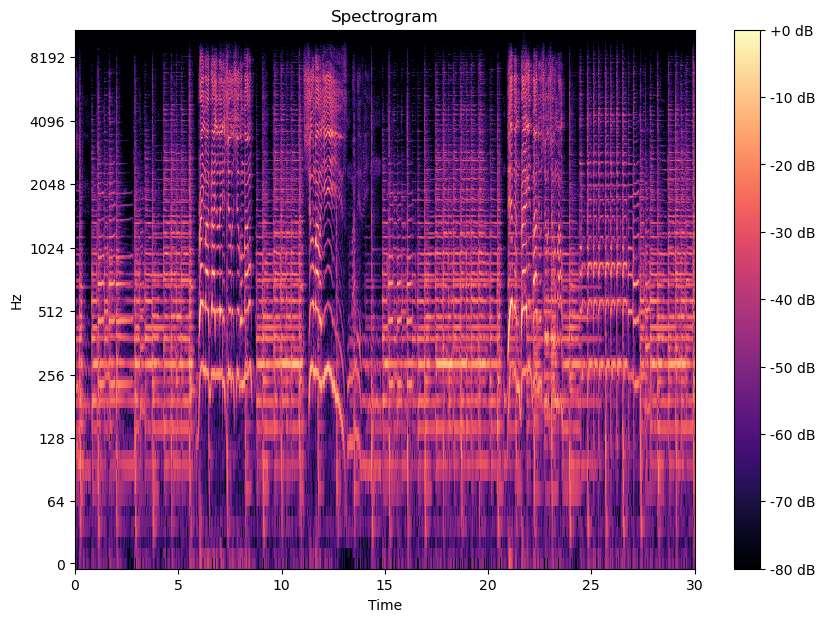

In [8]:
spectrogram = np.abs(librosa.stft(y, hop_length=512))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7));
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

# Melspectrogram

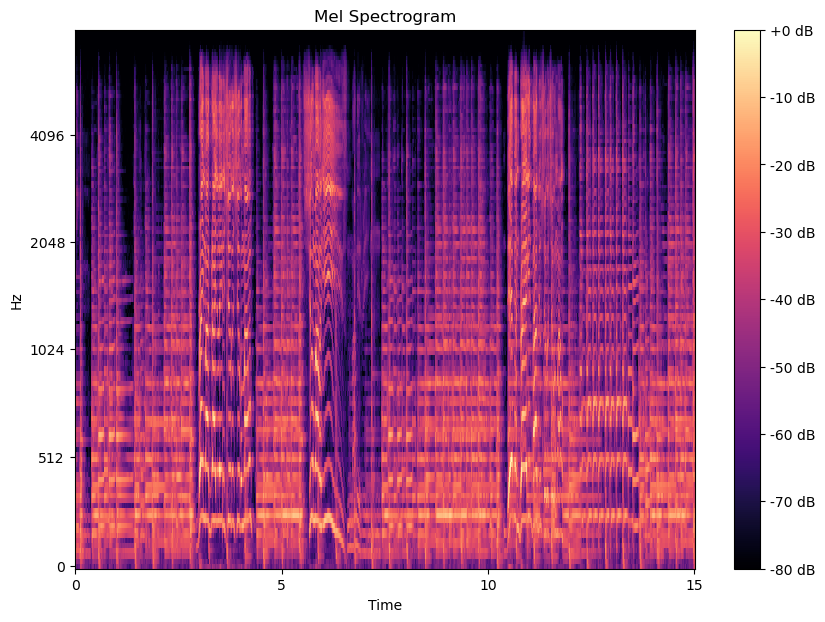

In [20]:
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7))
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

# MFFC 

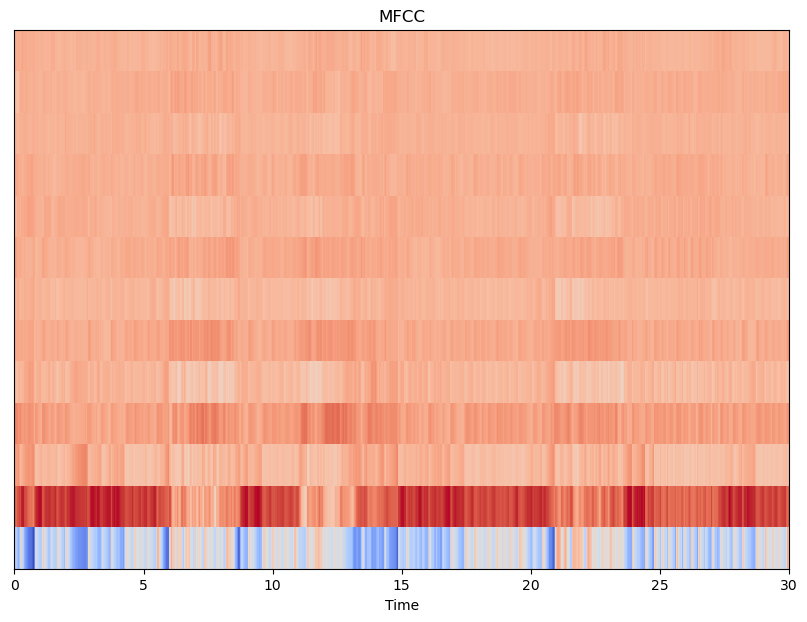

In [21]:
mfccData = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
plt.figure(figsize=(10,7));
librosa.display.specshow(mfccData, x_axis='time');
plt.title('MFCC');

# Below we will extract the sepctrogram data from the audio files in the parent folder. And save them into a dataframe and X and y.

In [28]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    m = []
    gl = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        gl.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
        s = spectrograms.flatten()
        m.append(s)
        
    m = np.array(m)
    gl = np.array(gl).reshape(1000,1)
    data = np.hstack((m,gl))
    data = pd.DataFrame(data)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y,data

In [25]:
X, y, data = melspectrogram('wavfiles/')

In [29]:
data.to_csv('spectrogramdata.csv', index=False)

# Data Cleaning

## Lets read the data and do the necessary changes

In [27]:
print(data)

          0           1           2           3           4           5      \
0    -33.144764  -34.706394  -30.291473  -31.983377   -34.71252   -18.91896   
1    -33.348507  -17.828934  -16.082321   -21.42917   -23.70478  -29.580908   
2     -33.07819  -38.951023  -38.105515  -36.680084   -33.89211  -34.302193   
3    -28.873878  -38.427704  -44.643795   -43.34305   -49.78785   -49.41929   
4     -57.91653  -53.033882  -52.625343  -54.882698  -45.236115   -44.02924   
..          ...         ...         ...         ...         ...         ...   
995  -27.562012   -47.69164  -46.345024  -49.496147   -39.20977   -42.82244   
996   -25.39069  -39.733505   -39.47815    -40.5058  -41.403725   -37.35714   
997  -36.710445   -35.05255    -32.9451   -37.01029  -53.510582   -46.68536   
998  -30.008583   -18.12199   -31.13604   -36.53118  -29.365623  -28.642797   
999   -41.20062   -42.72757    -44.5094   -43.39858  -38.841652  -45.078514   

          6           7           8           9    

In [30]:
data.head()

0           1           2           3           4           5      \
0  -33.144764  -34.706394  -30.291473  -31.983377   -34.71252   -18.91896   
1  -33.348507  -17.828934  -16.082321   -21.42917   -23.70478  -29.580908   
2   -33.07819  -38.951023  -38.105515  -36.680084   -33.89211  -34.302193   
3  -28.873878  -38.427704  -44.643795   -43.34305   -49.78785   -49.41929   
4   -57.91653  -53.033882  -52.625343  -54.882698  -45.236115   -44.02924   

        6          7           8           9      ... 84471 84472 84473 84474  \
0     -20.786  -28.10627   -35.85604   -35.90428  ...   0.0   0.0   0.0   0.0   
1  -28.251745  -31.71809  -36.745407  -38.221283  ...   0.0   0.0   0.0   0.0   
2  -28.007008  -34.43401   -39.12656  -44.014328  ...   0.0   0.0   0.0   0.0   
3  -45.321747  -45.88495  -48.977386   -47.32661  ...   0.0   0.0   0.0   0.0   
4  -50.053173  -53.21808  -59.152702  -54.893375  ...   0.0   0.0   0.0   0.0   

  84475 84476 84477 84478 84479  84480  
0   0.0   0.0   0.0   0.0   0.0  blues  
1   0.0   0.0   0.0   0.0   0.0  blues  
2   0.0   0.0   0.0   0.0   0.0  blues  
3   0.0   0.0   0.0   0.0   0.0  blues  
4   0.0   0.0   0.0   0.0   0.0  blues  

[5 rows x 84481 columns]

In [31]:
data.iloc[:,-1:]

84480
0    blues
1    blues
2    blues
3    blues
4    blues
..     ...
995   rock
996   rock
997   rock
998   rock
999   rock

[1000 rows x 1 columns]

### Lets rename the above column and map them to the values 

In [32]:
genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}

In [33]:
data.columns = data.columns.astype(str)
data = data.rename(columns={"84480": "labels"})

In [34]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '84471', '84472', '84473', '84474', '84475', '84476', '84477', '84478',
       '84479', 'labels'],
      dtype='object', length=84481)

In [35]:
data['y'] = data['labels'].map(genreLabels)

In [36]:
data

0           1           2           3           4           5  \
0    -33.144764  -34.706394  -30.291473  -31.983377   -34.71252   -18.91896   
1    -33.348507  -17.828934  -16.082321   -21.42917   -23.70478  -29.580908   
2     -33.07819  -38.951023  -38.105515  -36.680084   -33.89211  -34.302193   
3    -28.873878  -38.427704  -44.643795   -43.34305   -49.78785   -49.41929   
4     -57.91653  -53.033882  -52.625343  -54.882698  -45.236115   -44.02924   
..          ...         ...         ...         ...         ...         ...   
995  -27.562012   -47.69164  -46.345024  -49.496147   -39.20977   -42.82244   
996   -25.39069  -39.733505   -39.47815    -40.5058  -41.403725   -37.35714   
997  -36.710445   -35.05255    -32.9451   -37.01029  -53.510582   -46.68536   
998  -30.008583   -18.12199   -31.13604   -36.53118  -29.365623  -28.642797   
999   -41.20062   -42.72757    -44.5094   -43.39858  -38.841652  -45.078514   

              6           7           8           9  ... 84472 84473 84474  \
0       -20.786   -28.10627   -35.85604   -35.90428  ...   0.0   0.0   0.0   
1    -28.251745   -31.71809  -36.745407  -38.221283  ...   0.0   0.0   0.0   
2    -28.007008   -34.43401   -39.12656  -44.014328  ...   0.0   0.0   0.0   
3    -45.321747   -45.88495  -48.977386   -47.32661  ...   0.0   0.0   0.0   
4    -50.053173   -53.21808  -59.152702  -54.893375  ...   0.0   0.0   0.0   
..          ...         ...         ...         ...  ...   ...   ...   ...   
995   -52.43432   -48.82676   -55.49386  -49.966072  ...   0.0   0.0   0.0   
996  -40.387814   -37.23587  -41.253105  -35.735016  ...   0.0   0.0   0.0   
997  -28.989197  -19.120363  -28.009514   -33.68637  ...   0.0   0.0   0.0   
998  -35.535664   -46.90192  -41.276875  -36.719627  ...   0.0   0.0   0.0   
999  -52.843216   -58.66768  -52.394333    -47.4217  ...   0.0   0.0   0.0   

    84475 84476 84477 84478 84479 labels   y  
0     0.0   0.0   0.0   0.0   0.0  blues   1  
1     0.0   0.0   0.0   0.0   0.0  blues   1  
2     0.0   0.0   0.0   0.0   0.0  blues   1  
3     0.0   0.0   0.0   0.0   0.0  blues   1  
4     0.0   0.0   0.0   0.0   0.0  blues   1  
..    ...   ...   ...   ...   ...    ...  ..  
995   0.0   0.0   0.0   0.0   0.0   rock  10  
996   0.0   0.0   0.0   0.0   0.0   rock  10  
997   0.0   0.0   0.0   0.0   0.0   rock  10  
998   0.0   0.0   0.0   0.0   0.0   rock  10  
999   0.0   0.0   0.0   0.0   0.0   rock  10  

[1000 rows x 84482 columns]

# EDA

In [37]:
genres = list(data['labels'].unique())

In [38]:
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [39]:
def plotMelSpectrogram(genre):
    y, sr = librosa.core.load(f'wavfiles/{genre}.00000.wav')
    s = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    s = librosa.power_to_db(s, ref=np.max)
    plt.figure(figsize=(12,8))
    librosa.display.specshow(s, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

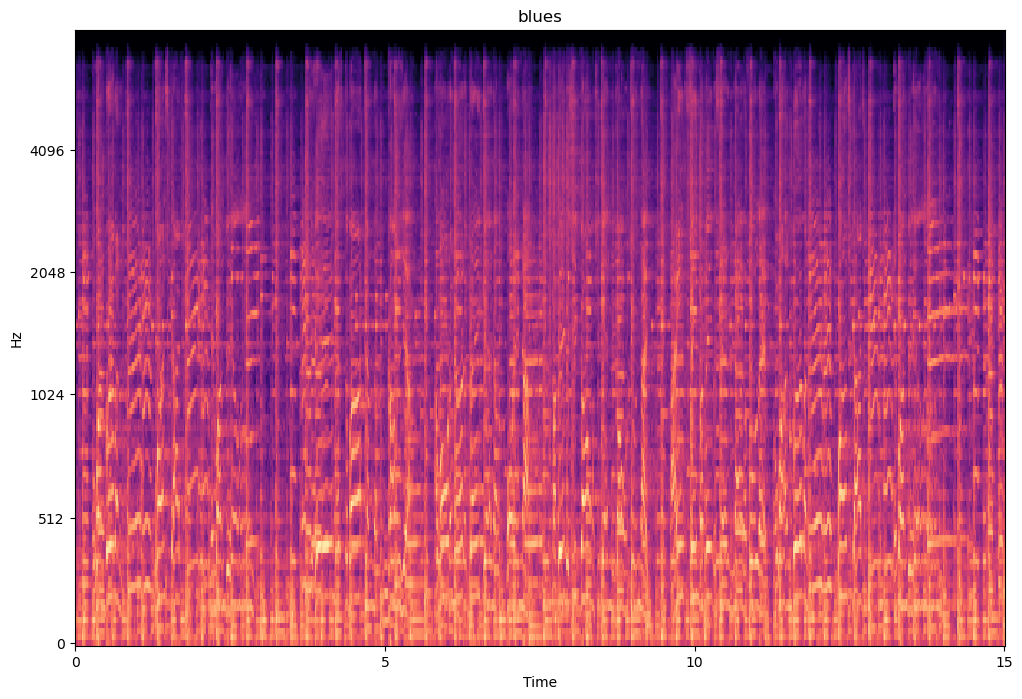

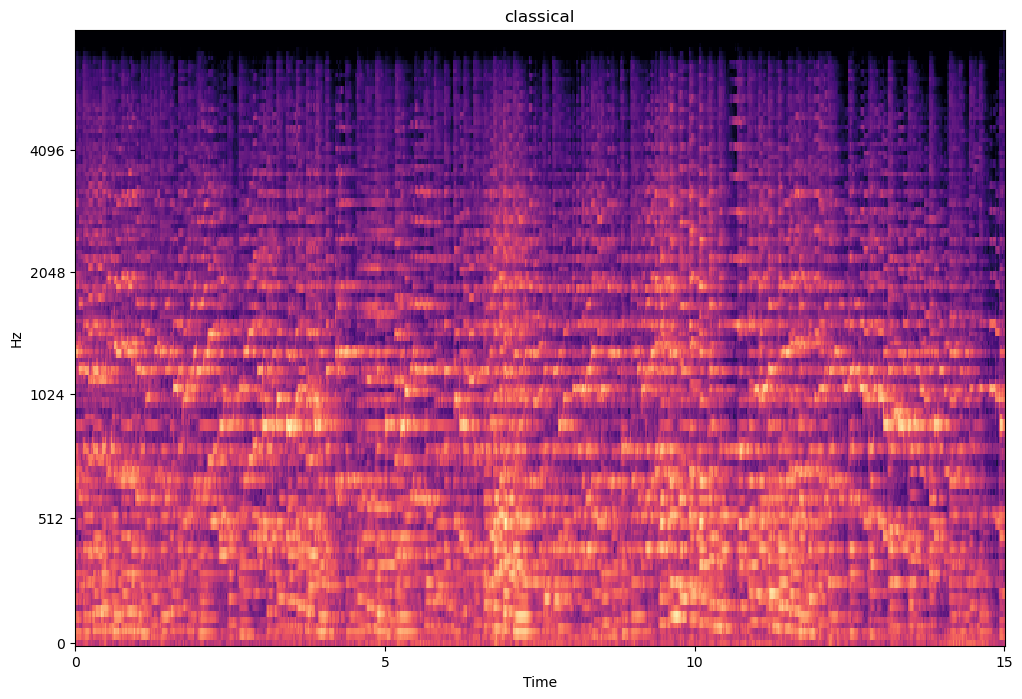

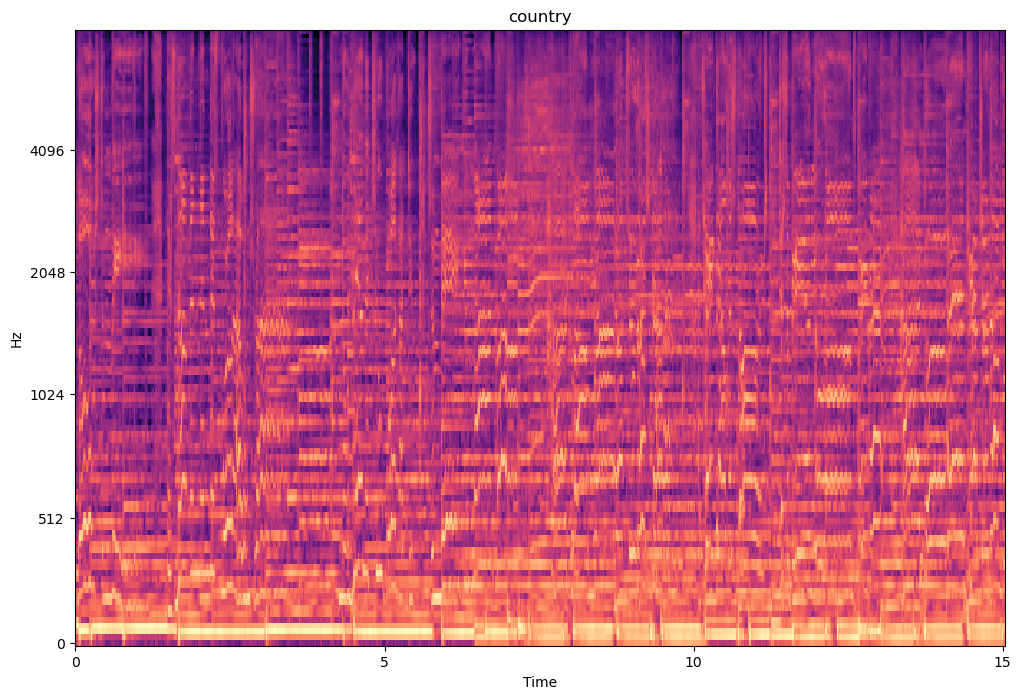

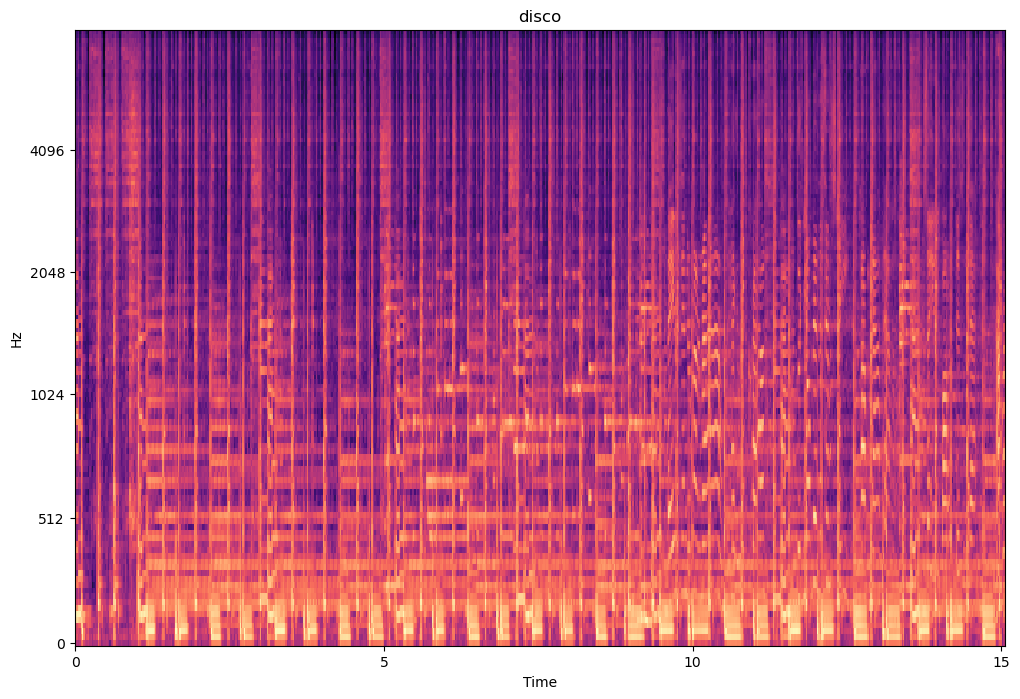

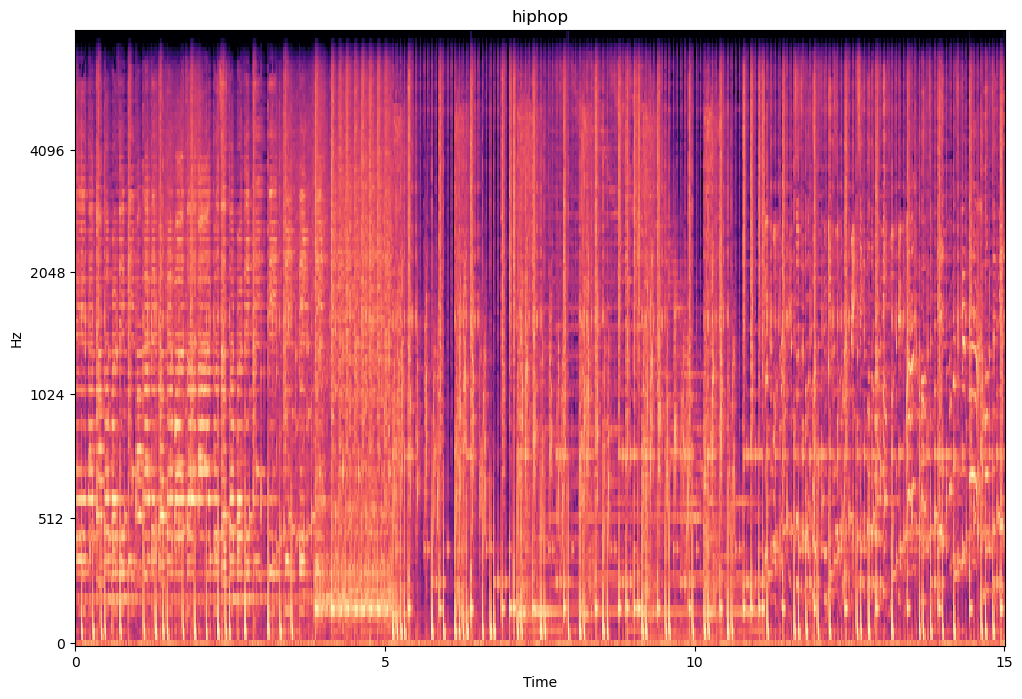

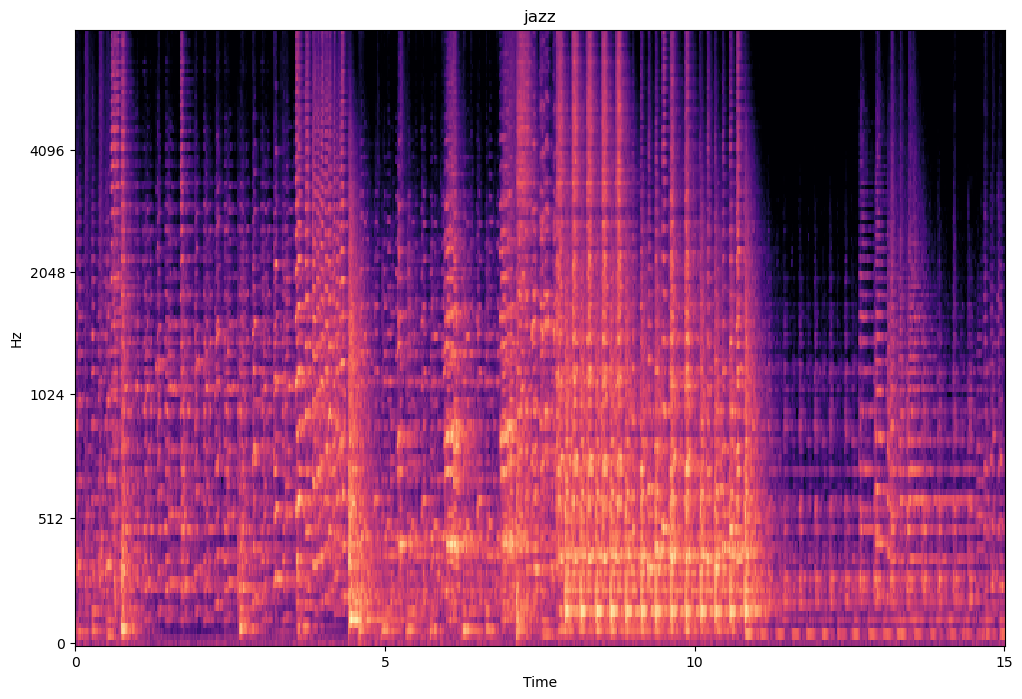

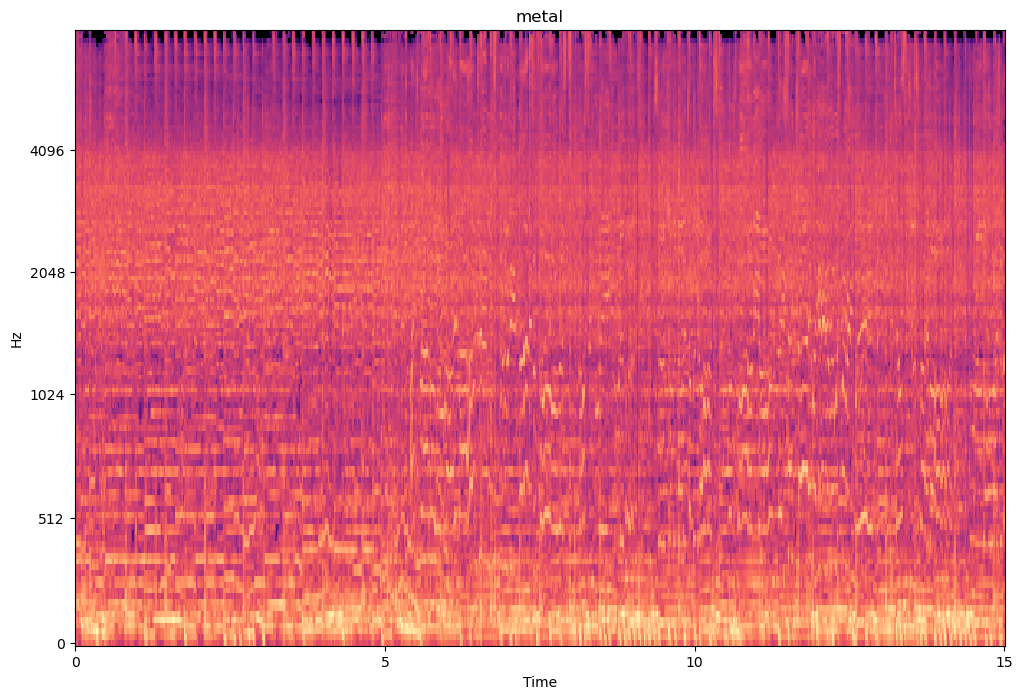

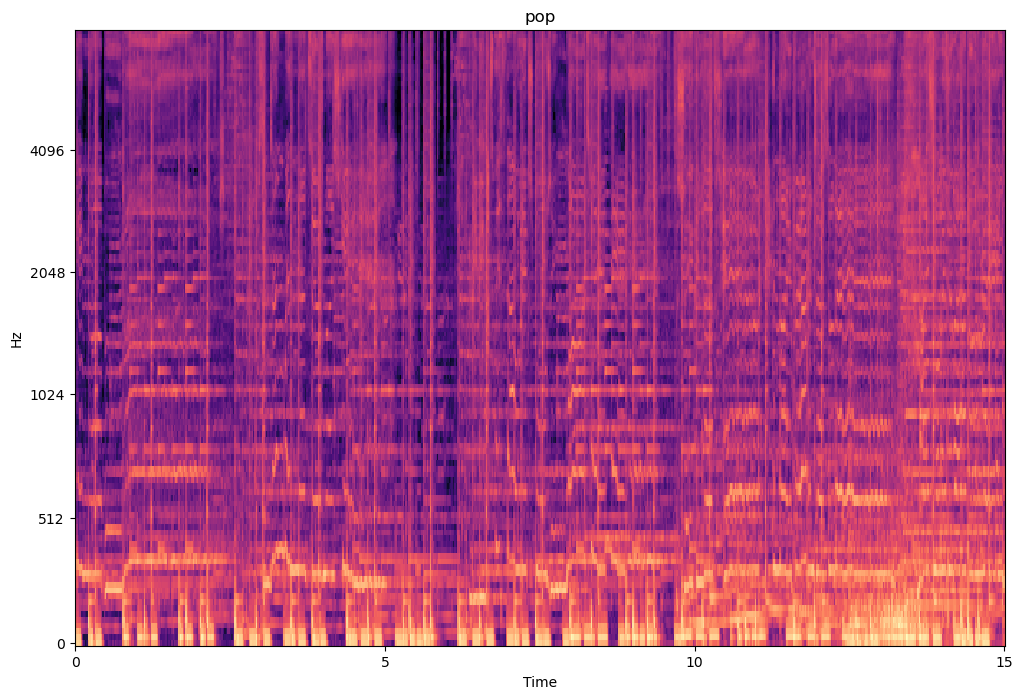

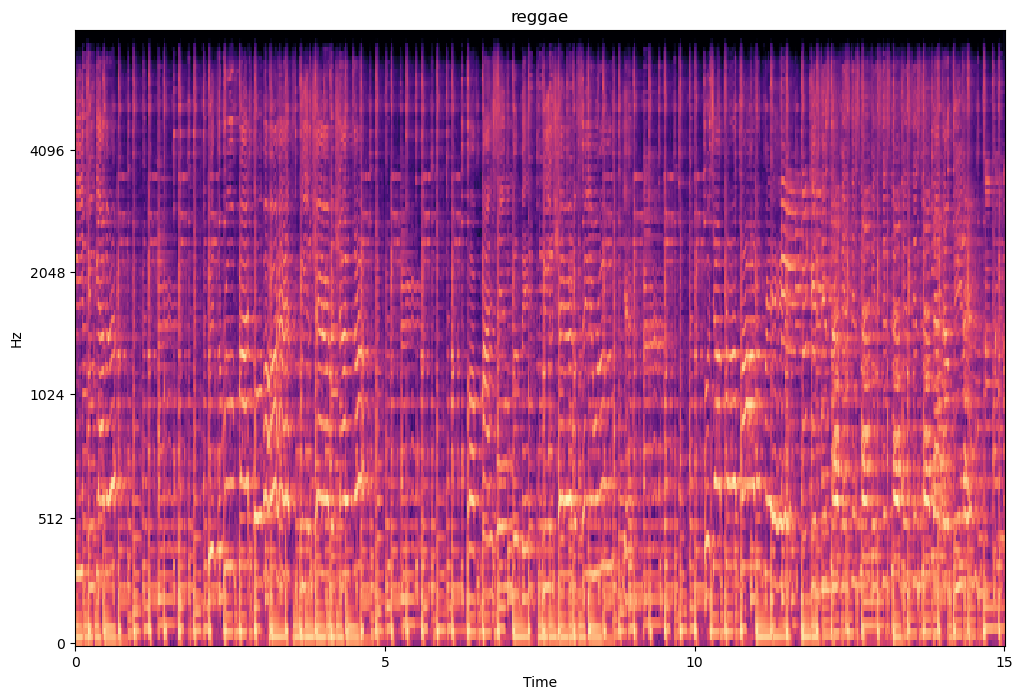

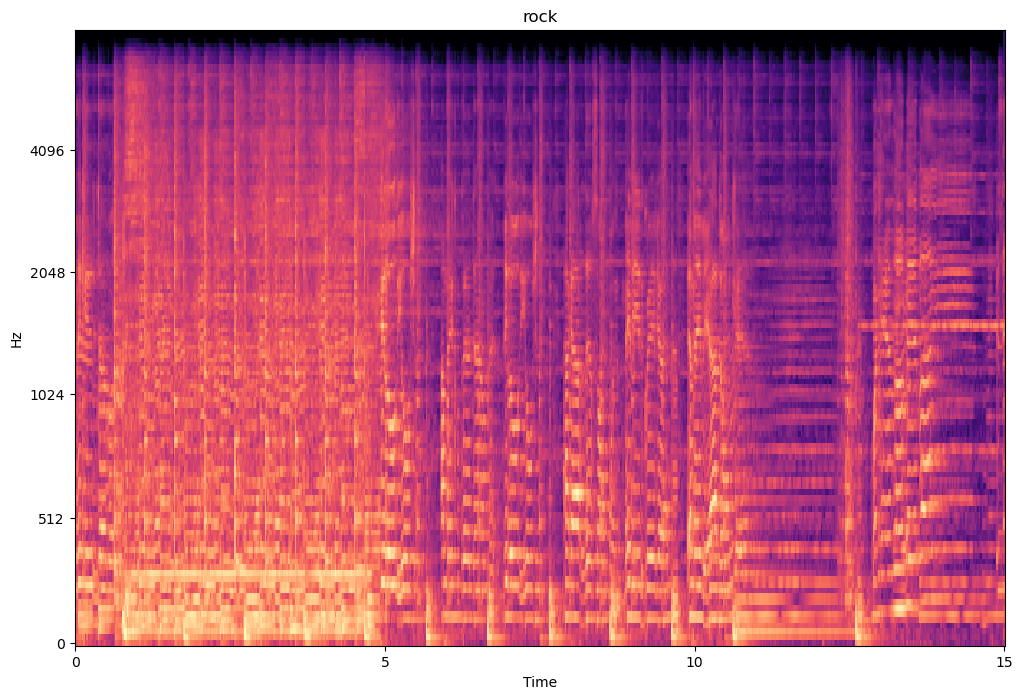

In [40]:
for g in genres:
    plotMelSpectrogram(g)